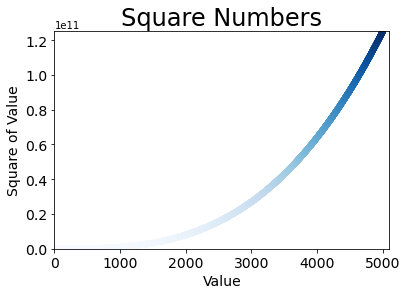

In [25]:
import matplotlib.pyplot as plt

x_values = list(range(1, 5001))
y_values = [x**3 for x in x_values]
color=(.8,.4,.9)
plt.scatter(x_values, y_values,c=y_values, cmap=plt.cm.Blues,edgecolor='none' ,s=40)

# Set the range for each axis.
plt.axis([0, 5100, 0, 5001**3+100])
# Set chart title and label axes.
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)
# Set size of tick labels.
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
#plt.savefig('squares_plot.png', bbox_inches='tight')

In [83]:
def getsteps():
    direction=choice([1, -1])
    distance=choice([0, 1, 2, 3, 4])
    return direction*distance
    

from random import choice
class RandomWalk():
    """A class to generate random walks."""
    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        #print(num_points)
        # All walks start at (0, 0).
        self.x_values = [0]
        self.y_values = [0]
    #########################
    def fill_walk(self):
        """Calculate all the points in the walk."""
        # Keep taking steps until the walk reaches the desired length.
        while len(self.x_values) < self.num_points:
            #Decide which direction to go and how far to go in that direction.
            x_step =getsteps() 
            y_step =getsteps() 
            # Reject moves that go nowhere.
            if x_step == 0 and y_step == 0:
                continue
            # Calculate the next x and y values.
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            self.x_values.append(next_x)
            self.y_values.append(next_y)

<ipython-input-86-1ced216a946b>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().get_xaxis().set_visible(False)
<ipython-input-86-1ced216a946b>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().get_yaxis().set_visible(False)


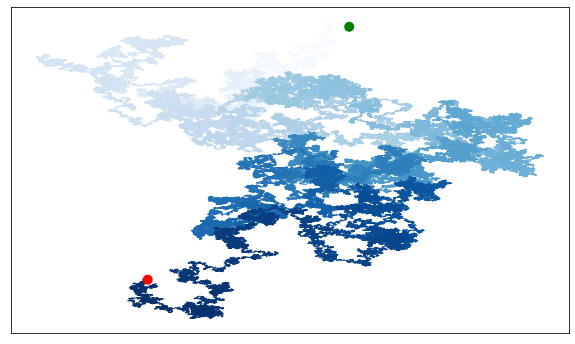

In [86]:
import matplotlib.pyplot as plt
# Make a random walk, and plot the points.
rw = RandomWalk(500000)
rw.fill_walk()
# Set the size of the plotting window.
plt.figure(figsize=(10, 6))
point_numbers = list(range(rw.num_points))
#plt.plot(rw.x_values, rw.y_values)
plt.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues,
edgecolor='none', s=1)
# Emphasize the first and last points.
plt.scatter(0, 0, c='green', edgecolors='none', s=100)
plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none',
s=100)
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.show()

In [9]:
import pygal
import random
class Die():
    """A class representing a single die."""
    def __init__(self, num_sides=6):
        """Assume a six-sided die."""
        self.num_sides = num_sides
    def roll(self):
        """"Return a random value between 1 and number of sides."""
        return random.randint(1, self.num_sides)

[782, 1634, 2516, 3248, 4211, 4984, 4970, 4975, 4963, 5061, 4152, 3443, 2516, 1760, 785]


OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': error 0x7e
cannot load library 'libcairo.2.dylib': error 0x7e
cannot load library 'libcairo-2.dll': error 0x7e

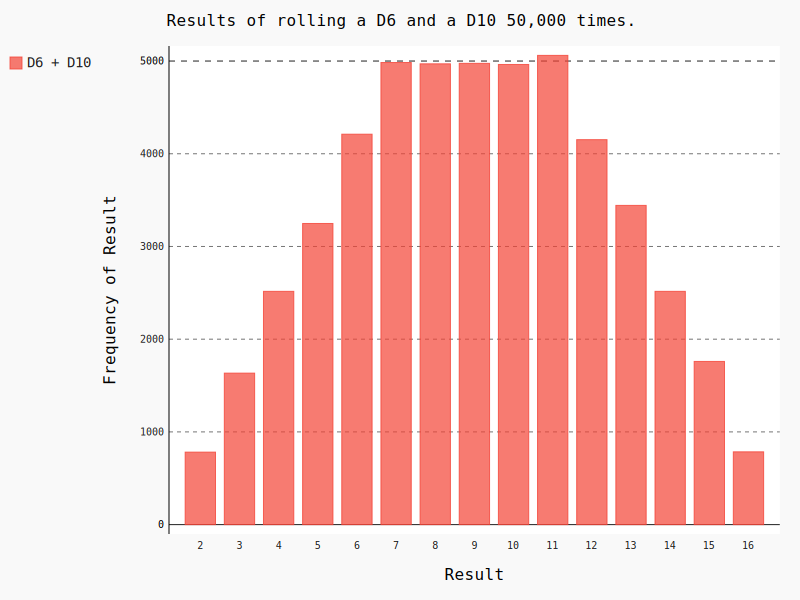

In [18]:
# Create a D6.
die = Die()
die1=Die(10)
# Make some rolls, and store results in a list.
results = []
for roll_num in range(50000):
    result = die.roll()+die1.roll()
    results.append(result)
#print(results)
# Analyze the results.
frequencies = []
max_result = die1.num_sides + die.num_sides
for value in range(2, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)
print(frequencies)
# Visualize the results.
hist = pygal.Bar()
hist.title = "Results of rolling a D6 and a D10 50,000 times."
hist.x_labels =[str(2+(x)) for x in range (15)]
hist.x_title = "Result"
hist.y_title = "Frequency of Result"
hist.add('D6 + D10', frequencies)
#hist.render_to_file('die_visual.svg')
